In [49]:

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import resnet50
from tensorflow.keras.datasets import mnist, fashion_mnist
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense,MaxPool2D,MaxPooling2D

In [50]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()

In [51]:

x_train_mnist = x_train_mnist / 255.0
x_test_mnist = x_test_mnist / 255.0

In [52]:
print(f'shape of x_train_mnist={x_train_mnist.shape} , x_test_mnist={x_test_mnist.shape} , y_train_mnist={y_train_mnist.shape} and y_test_mnist={y_test_mnist.shape}')


shape of x_train_mnist=(60000, 28, 28) , x_test_mnist=(10000, 28, 28) , y_train_mnist=(60000,) and y_test_mnist=(10000,)


In [53]:
x_train_mnist=x_train_mnist.reshape((x_train_mnist.shape[0],28,28,1))
x_test_mnist=x_test_mnist.reshape((x_test_mnist.shape[0],28,28,1))
y_train_mnist = to_categorical(y_train_mnist)
y_test_mnist = to_categorical(y_test_mnist)

In [54]:
print(f'shape of x_train_mnist={x_train_mnist.shape} , x_test_mnist={x_test_mnist.shape} , y_train_mnist={y_train_mnist.shape} and y_test_mnist={y_test_mnist.shape}')


shape of x_train_mnist=(60000, 28, 28, 1) , x_test_mnist=(10000, 28, 28, 1) , y_train_mnist=(60000, 10) and y_test_mnist=(10000, 10)


VGG16

In [55]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [56]:
model=models.Sequential()

In [57]:
'''
1-2*64 +pool
2-2*128+pool
3-2*256+pool
4=3*512+pool
5-3*512+pool
Flatten
full layer
'''
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))


In [58]:
model.add(layers.Flatten())


In [59]:
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [60]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train_mnist, y_train_mnist, epochs=5, batch_size=64, validation_data=(x_test_mnist, y_test_mnist))

Epoch 1/5
938/938 [==============================] - 2630s 3s/step - loss: 0.5551 - accuracy: 0.7998 - val_loss: 0.1298 - val_accuracy: 0.9709
Epoch 2/5
938/938 [==============================] - 2588s 3s/step - loss: 0.0811 - accuracy: 0.9792 - val_loss: 0.0578 - val_accuracy: 0.9838
Epoch 3/5
938/938 [==============================] - 2560s 3s/step - loss: 0.0624 - accuracy: 0.9848 - val_loss: 0.0384 - val_accuracy: 0.9896
Epoch 4/5
938/938 [==============================] - 2555s 3s/step - loss: 0.0531 - accuracy: 0.9865 - val_loss: 0.0384 - val_accuracy: 0.9908
Epoch 5/5
938/938 [==============================] - 2618s 3s/step - loss: 0.0477 - accuracy: 0.9883 - val_loss: 0.0701 - val_accuracy: 0.9852


In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_46 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_48 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                

In [62]:
for layer in model.layers:
    print(f"Layer Name: {layer.name}")
    print(f"Trainable Parameters: {layer.count_params()}\n")

Layer Name: conv2d_45
Trainable Parameters: 640

Layer Name: conv2d_46
Trainable Parameters: 36928

Layer Name: max_pooling2d_18
Trainable Parameters: 0

Layer Name: conv2d_47
Trainable Parameters: 73856

Layer Name: conv2d_48
Trainable Parameters: 147584

Layer Name: max_pooling2d_19
Trainable Parameters: 0

Layer Name: conv2d_49
Trainable Parameters: 295168

Layer Name: conv2d_50
Trainable Parameters: 590080

Layer Name: conv2d_51
Trainable Parameters: 590080

Layer Name: max_pooling2d_20
Trainable Parameters: 0

Layer Name: conv2d_52
Trainable Parameters: 1180160

Layer Name: conv2d_53
Trainable Parameters: 2359808

Layer Name: conv2d_54
Trainable Parameters: 2359808

Layer Name: max_pooling2d_21
Trainable Parameters: 0

Layer Name: flatten_3
Trainable Parameters: 0

Layer Name: dense_8
Trainable Parameters: 2101248

Layer Name: dense_9
Trainable Parameters: 16781312

Layer Name: dense_10
Trainable Parameters: 40970



313/313 [==============================] - 82s 262ms/step


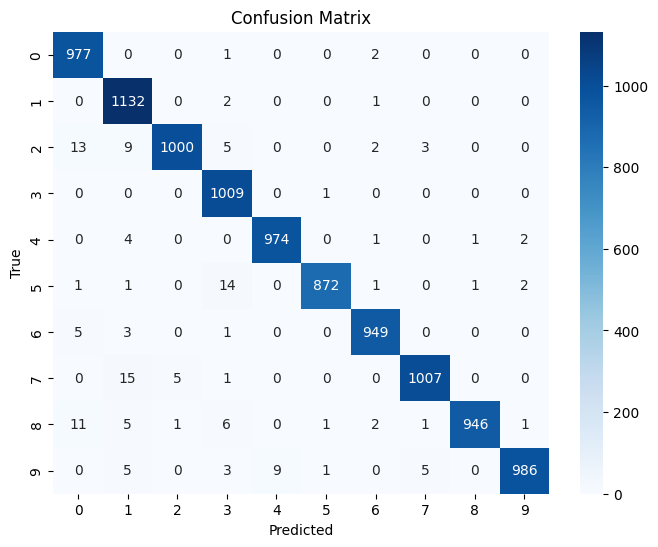

In [63]:
import numpy as np
predictions = model.predict(x_test_mnist)
conf_matrix = confusion_matrix(np.argmax(y_test_mnist, axis=1), np.argmax(predictions, axis=1))
# print("Confusion Matrix:")
# print(conf_matrix)
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [64]:
# Calculate precision, recall, and F1 score
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_test_mnist, axis=1), np.argmax(predictions, axis=1), average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Precision: 0.9854756866557355
Recall: 0.9852
F1 Score: 0.9852103664646674


Resnet50